Liczba singularnych wartości potrzebna do zachowania 90% energii: 4


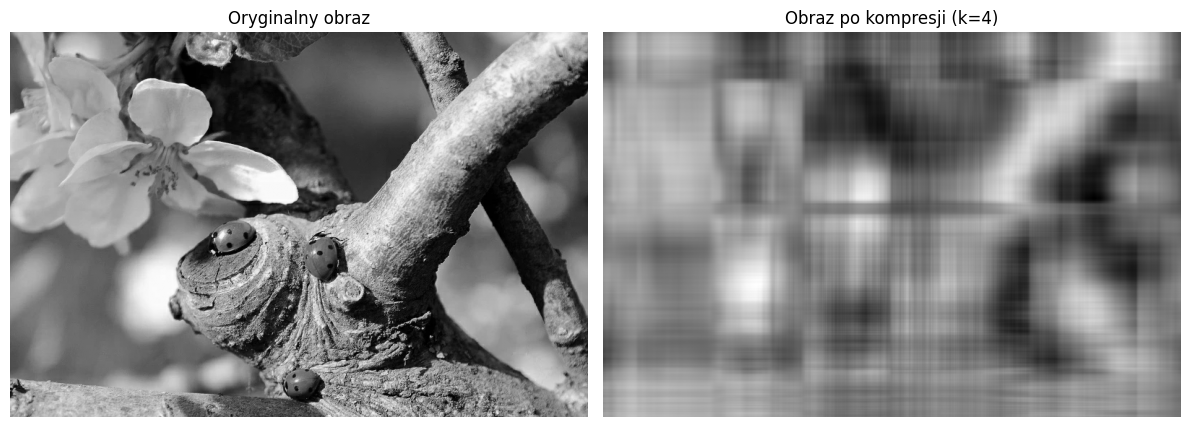

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_path = '11.webp'

img = mpimg.imread(image_path)
if img.ndim == 3:
    img = img.mean(axis=2)

U, S, VT = np.linalg.svd(img, full_matrices=False)

total_energy = np.sum(S**2)

cumulative_energy = np.cumsum(S**2)
k_90 = np.searchsorted(cumulative_energy, 0.9 * total_energy) + 1

print(f"Liczba singularnych wartości potrzebna do zachowania 90% energii: {k_90}")

S_k = np.diag(S[:k_90])
U_k = U[:, :k_90]
VT_k = VT[:k_90, :]
img_approx = np.dot(U_k, np.dot(S_k, VT_k))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Oryginalny obraz")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_approx, cmap='gray')
plt.title(f"Obraz po kompresji (k={k_90})")
plt.axis('off')

plt.tight_layout()
plt.show()
